<a href="https://www.kaggle.com/code/kelixirr/lda-implementation-in-numpy-and-sklearn?scriptVersionId=155181530" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Example 1

In [5]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[0, 1, 2, 3, 4, 5, 1, 2, 3, 3, 5, 6, 7, 8], [1, 2, 3, 3, 5, 5, 0, 1, 1, 2, 3, 5, 6, 6]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
X = X.T
X

array([[0, 1],
       [1, 2],
       [2, 3],
       [3, 3],
       [4, 5],
       [5, 5],
       [1, 0],
       [2, 1],
       [3, 1],
       [3, 2],
       [5, 3],
       [6, 5],
       [7, 6],
       [8, 6]])

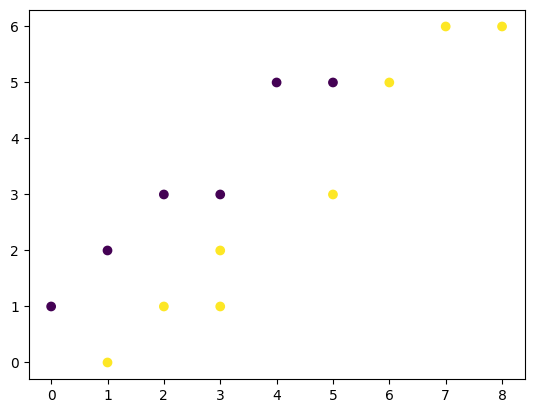

In [8]:
# plot the data
plt.scatter(X[:, 0], X[:, 1], c = y);

In [9]:
# Apply PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
pca.fit(X)
Xr = pca.transform(X)
print(Xr)

[[-4.07140709]
 [-2.6633141 ]
 [-1.25522111]
 [-0.48545908]
 [ 1.56096488]
 [ 2.3307269 ]
 [-3.93997604]
 [-2.53188305]
 [-1.76212102]
 [-1.12379005]
 [ 1.05406496]
 [ 3.10048893]
 [ 4.50858192]
 [ 5.27834394]]


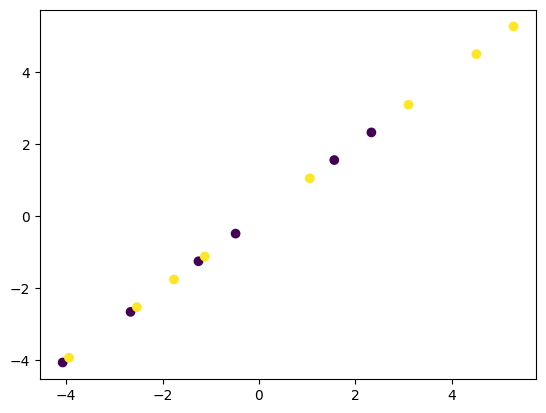

In [11]:
# PCA projection - not separting the classes as you can see below
plt.scatter(Xr[:, 0], Xr[:, 0], c = y);

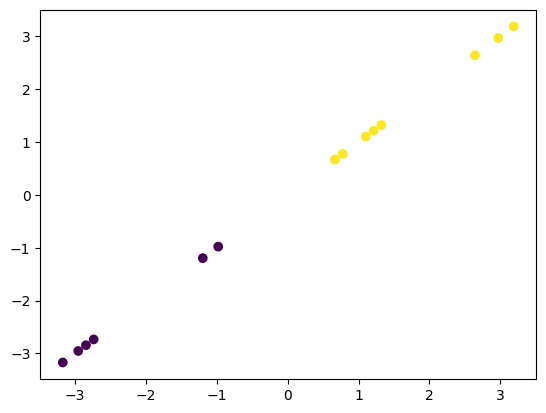

In [13]:
# Apply LDA - See the classes are clearly linearly separable
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)
plt.scatter(X_lda[:, 0], X_lda[:, 0], c = y);

## Example 2 - Just Using Numpy

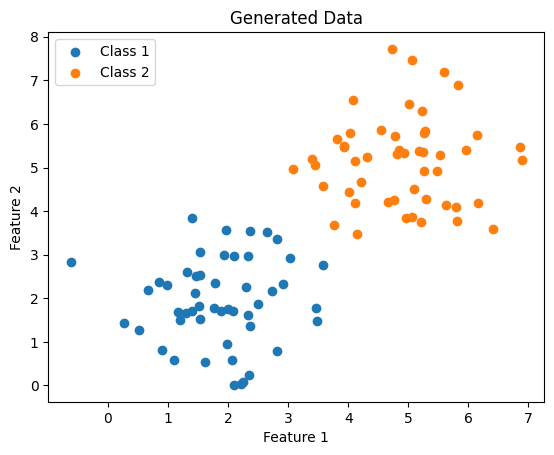

In [15]:
# Generate simple 2D dataset with two classes
np.random.seed(42)
class1_data = np.random.randn(50, 2) + np.array([2, 2])
class2_data = np.random.randn(50, 2) + np.array([5, 5])

# Plot data
plt.scatter(class1_data[:, 0], class1_data[:, 1], label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], label='Class 2')
plt.title('Generated Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [16]:
# Step 1: Calculate Class Means
mean_class1 = np.mean(class1_data, axis=0)
mean_class2 = np.mean(class2_data, axis=0)

print("Mean of Class 1:", mean_class1)
print("Mean of Class 2:", mean_class2)

Mean of Class 1: [1.86432437 1.9279826 ]
Mean of Class 2: [4.90454712 5.14006205]


In [17]:
# Step 2: Calculate Within-Class Scatter Matrix (SW)
cov_class1 = np.cov(class1_data.T)
cov_class2 = np.cov(class2_data.T)
SW = cov_class1 + cov_class2

print("Within-Class Scatter Matrix (SW):\n", SW)

Within-Class Scatter Matrix (SW):
 [[1.48068393 0.05150437]
 [0.05150437 1.99285063]]


In [18]:
# Step 3: Calculate Between-Class Scatter Matrix (SB)
mean_diff = (mean_class1 - mean_class2).reshape(2, 1)
SB = np.dot(mean_diff, mean_diff.T)

print("Between-Class Scatter Matrix (SB):\n", SB)

Between-Class Scatter Matrix (SB):
 [[ 9.24295438  9.76543705]
 [ 9.76543705 10.31745443]]


In [19]:
# Step 4: Solve the Generalized Eigenvalue Problem

# Compute the eigenvalues and eigenvectors
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(SW).dot(SB))

# Sort eigenvalues and corresponding eigenvectors
sorted_indices = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_indices]
eig_vecs = eig_vecs[:, sorted_indices]

print("Eigenvalues:\n", eig_vals)
print("Eigenvectors:\n", eig_vecs)

Eigenvalues:
 [1.10886562e+01 8.88178420e-16]
Eigenvectors:
 [[ 0.78832477 -0.72626868]
 [ 0.61525933  0.68741094]]


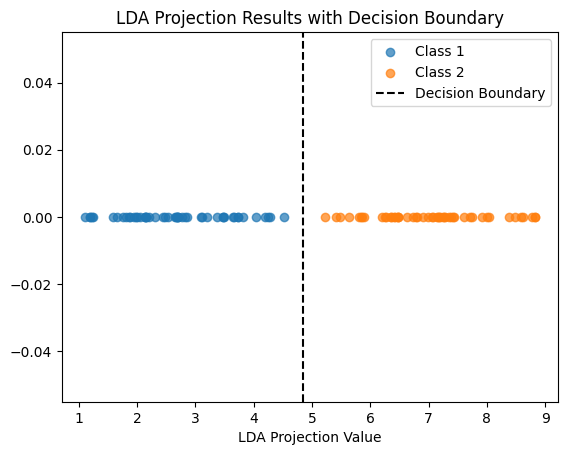

In [26]:
# Step 5: Choose Top Eigenvector and Project Data
# Choose the top eigenvector for projection (LDA dimensionality reduction)
W = eig_vecs[:, 0]

# Project the data onto the new feature subspace
lda_result_class1 = class1_data.dot(W)
lda_result_class2 = class2_data.dot(W)

# Plot the LDA results with correct decision boundary
plt.scatter(lda_result_class1, np.zeros_like(lda_result_class1), label='Class 1', alpha=0.7)
plt.scatter(lda_result_class2, np.zeros_like(lda_result_class2), label='Class 2', alpha=0.7)

# Plot the linear discriminant line (decision boundary)
decision_boundary = (mean_class1.dot(W) + mean_class2.dot(W)) / 2
plt.axvline(x=decision_boundary, color='black', linestyle='--', label='Decision Boundary')

plt.title('LDA Projection Results with Decision Boundary')
plt.xlabel('LDA Projection Value')
plt.legend()
plt.show()

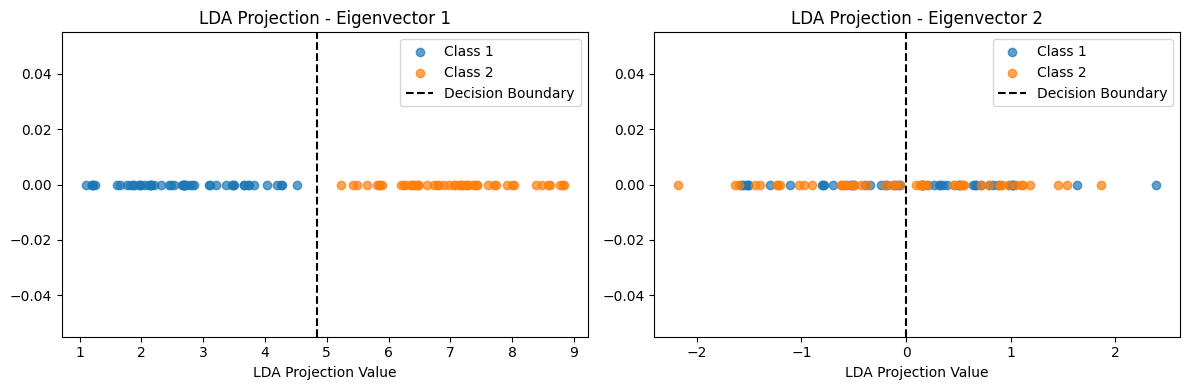

In [23]:
# Project the data onto the new feature subspace for the top two eigenvectors
W1 = eig_vecs[:, 0]
W2 = eig_vecs[:, 1]

lda_result_class1_W1 = class1_data.dot(W1)
lda_result_class2_W1 = class2_data.dot(W1)

lda_result_class1_W2 = class1_data.dot(W2)
lda_result_class2_W2 = class2_data.dot(W2)

# Plot the LDA results for the top two eigenvectors
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(lda_result_class1_W1, np.zeros_like(lda_result_class1_W1), label='Class 1', alpha=0.7)
plt.scatter(lda_result_class2_W1, np.zeros_like(lda_result_class2_W1), label='Class 2', alpha=0.7)
plt.axvline(x=decision_boundary, color='black', linestyle='--', label='Decision Boundary')
plt.title('LDA Projection - Eigenvector 1')
plt.xlabel('LDA Projection Value')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(lda_result_class1_W2, np.zeros_like(lda_result_class1_W2), label='Class 1', alpha=0.7)
plt.scatter(lda_result_class2_W2, np.zeros_like(lda_result_class2_W2), label='Class 2', alpha=0.7)
plt.axvline(x=0, color='black', linestyle='--', label='Decision Boundary')
plt.title('LDA Projection - Eigenvector 2')
plt.xlabel('LDA Projection Value')
plt.legend()

plt.tight_layout()
plt.show()

## Example 3 - LDA on Wine Dataset

* Number of Instances: The dataset consists of a total of 178 instances.
* Number of Features: There are 13 attributes (features) in the dataset, representing various chemical properties of the wines. 
* Classes: The dataset is divided into three classes, each corresponding to a different type of wine. The classes are labeled 1, 2, and 3.

Since there are 3 classes we can max go to 2 dimension in LDA. We will do that here. 

In [29]:
from sklearn.datasets import load_wine
import pandas as pd
wine = load_wine()
X = np.array(wine.data)
y = np.array(wine.target)
print(X[1:5, :])
print(y)

[[1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [31]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

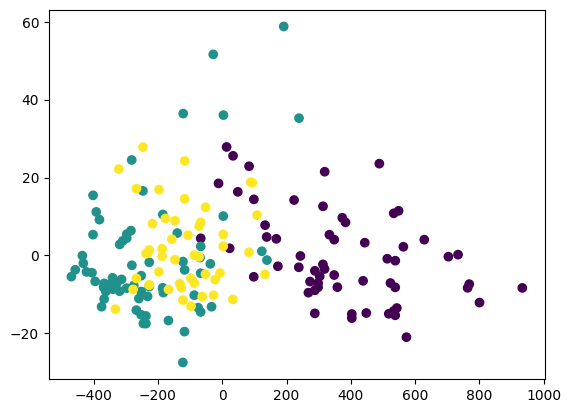

In [33]:
# Apply PCA - Check the output 
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
result = pca.fit(X)
Z = result.transform(X)
plt.scatter(Z[:,0], Z[:,1], c = y);

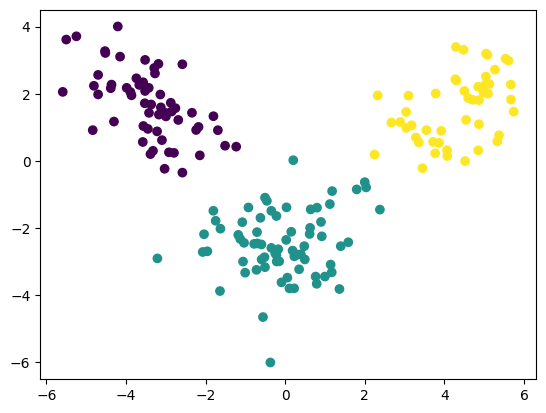

In [36]:
# Apply LDA - Check the output and compare it with PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c = y);

You can also use LDA as a classifier.